In [57]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from pathlib import Path
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


from Models.ARIMA import *
from Models.Helper import *
from Data import *
from Models.MLP import *
from Models.Hybrid import *

In [59]:
IBBmonth = Path.cwd() / "data" / "IBBmonth.csv"

# 10 year ETFs
IBB = Path.cwd() / "data" / "IBB.csv"
#ICLN = Path.cwd() / "data" / "ICLN.csv"
#IYW = Path.cwd() / "data" / "IYW.csv"

# 5 year ETFs
ARKK = Path.cwd() / "data" / "ARKK.csv"
#ARKW = Path.cwd() / "data" / "ARKW.csv"

# 1 year ETFs
ARKQ = Path.cwd() / "data" / "ARKQ.csv"
#ARKG = Path.cwd() / "data" / "ARKG.csv"
#ARKF = Path.cwd() / "data" / "ARKF.csv"





data_close = load_data(IBB)

In [60]:
len(data_close)

2517

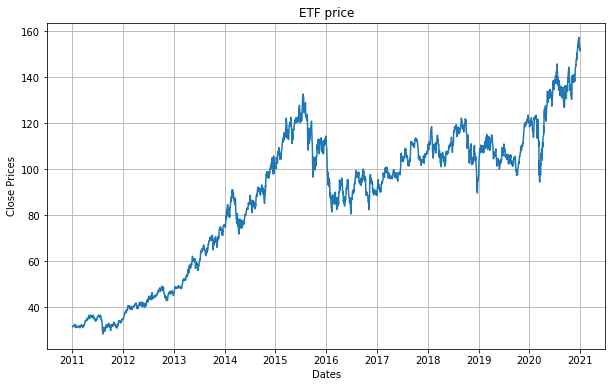

In [61]:
#Plot of closing prices
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data_close['Close'])
plt.title('ETF price')
plt.show()

Number of values above 0.9 autocorrelation is:  60


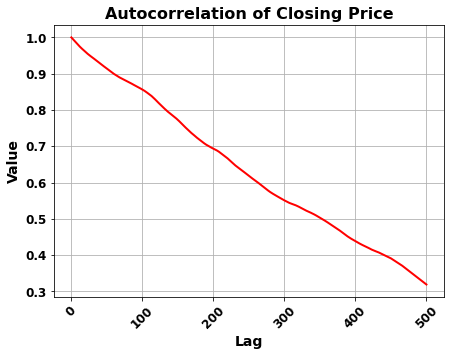

In [62]:
input_dim = find_input_dim(data_close['Close'])

In [63]:
#Split dataset

data_copy = data_close.copy()

train_data, test_data = train_test_split(data_copy.iloc[input_dim:], test_size=0.10, shuffle = False)

print(train_data)

                 Close
Date                  
2011-03-30   33.180000
2011-03-31   33.386665
2011-04-01   33.630001
2011-04-04   33.713333
2011-04-05   34.143333
...                ...
2020-01-06  119.120003
2020-01-07  119.150002
2020-01-08  120.220001
2020-01-09  121.040001
2020-01-10  120.449997

[2211 rows x 1 columns]


In [64]:
n_diffs = find_differencing(train_data)

Estimated differencing term: 1


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7555.373, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7556.642, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7556.601, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7555.303, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7553.120, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7554.152, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7554.210, Time=0.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7556.778, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7557.093, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7553.857, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7552.984, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7556.458, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7556.502, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7554.095, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0]          

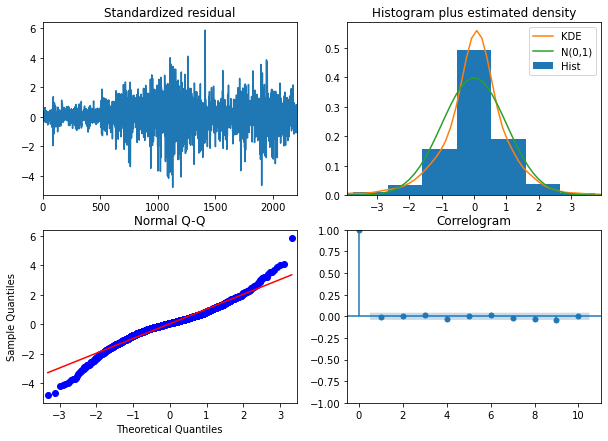

In [65]:
arima_model_order =  auto_arima(train_data,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, test='kpss', seasonal_test='ocsb', error_action='warn',
                          trace = True, supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)

arima_model_order.plot_diagnostics(figsize=(10,7))
plt.show()

In [66]:
#result = seasonal_decompose(data_close['Close'], model='multiplicative', period = 30)
#fig = plt.figure()  
#fig = result.plot()  
#fig.set_size_inches(16, 9)

C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2210
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3772.560
Method:                       css-mle   S.D. of innovations              1.334
Date:                Mon, 02 Aug 2021   AIC                           7553.120
Time:                        13:05:45   BIC                           7575.923
Sample:                             1   HQIC                          7561.451
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0395      0.029      1.365      0.172      -0.017       0.096
ar.L1.D.Close    -0.7715      0.139     -5.534      0.000      -1.045      -0.498
ma.L1.D.Close     0.8053      0.130     

C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


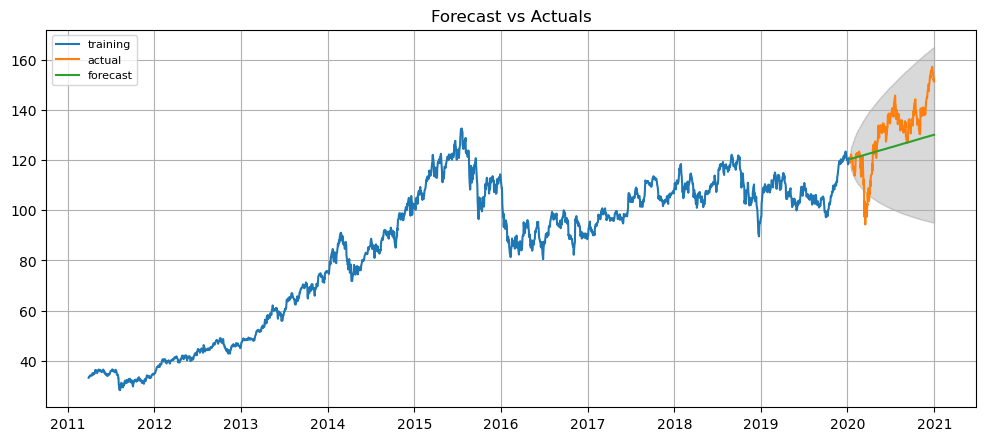

In [67]:
fc, fc_series = ARIMA_pred(train_data, test_data, arima_model_order.order)

In [68]:
print("Error measures for ARIMA:")
calculate_error_measures(test_data, fc)

Error measures for ARIMA:
Mean Squared Error:  137.95348437141607
Mean Absolute Error:  9.686223544881155
R-squared Score: 0.1272


[137.95348437141607, 9.686223544881155, 0.12715637315655937]

In [69]:
list_of_attributes = ['Close']

list_of_prev_t_instants = []
for i in range(1, input_dim+1):
    list_of_prev_t_instants.append(i)

df_new = create_regressor_attributes(data_close, list_of_attributes, list_of_prev_t_instants)

df_new.shape

(2457, 61)

In [70]:
df_new.head()

,Close,Close_(t-1),Close_(t-2),Close_(t-3),Close_(t-4),Close_(t-5),Close_(t-6),Close_(t-7),Close_(t-8),Close_(t-9),...,Close_(t-51),Close_(t-52),Close_(t-53),Close_(t-54),Close_(t-55),Close_(t-56),Close_(t-57),Close_(t-58),Close_(t-59),Close_(t-60)
datetime,,,,,,,,,,,,,,,,,,,,,
2011-03-30,33.180000,32.606667,32.113335,32.186668,32.116669,31.639999,31.549999,31.629999,31.376667,31.176666,...,32.070000,32.023335,31.993334,31.820000,31.646667,31.683332,31.696667,31.549999,31.299999,31.430000
2011-03-31,33.386665,33.180000,32.606667,32.113335,32.186668,32.116669,31.639999,31.549999,31.629999,31.376667,...,32.423332,32.070000,32.023335,31.993334,31.820000,31.646667,31.683332,31.696667,31.549999,31.299999
2011-04-01,33.630001,33.386665,33.180000,32.606667,32.113335,32.186668,32.116669,31.639999,31.549999,31.629999,...,31.636667,32.423332,32.070000,32.023335,31.993334,31.820000,31.646667,31.683332,31.696667,31.549999
2011-04-04,33.713333,33.630001,33.386665,33.180000,32.606667,32.113335,32.186668,32.116669,31.639999,31.549999,...,31.629999,31.636667,32.423332,32.070000,32.023335,31.993334,31.820000,31.646667,31.683332,31.696667
2011-04-05,34.143333,33.713333,33.630001,33.386665,33.180000,32.606667,32.113335,32.186668,32.116669,31.639999,...,31.340000,31.629999,31.636667,32.423332,32.070000,32.023335,31.993334,31.820000,31.646667,31.683332


In [71]:
X_train, y_train, X_valid, y_valid, X_test, y_test = create_train_valid_test(df_new, 0.10, 0.10)


Shape of training inputs, training target: (1989, 60) (1989,)
Shape of validation inputs, validation target: (222, 60) (222,)
Shape of test inputs, test target: (246, 60) (246,)


In [72]:
scaler = MinMaxScaler()

X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_scaled = scale_data(
    X_train, y_train, X_valid, y_valid, X_test, y_test, scaler)


In [73]:
y_test_rescaled = scaler.inverse_transform(y_test_scaled)


[INFO] training model...


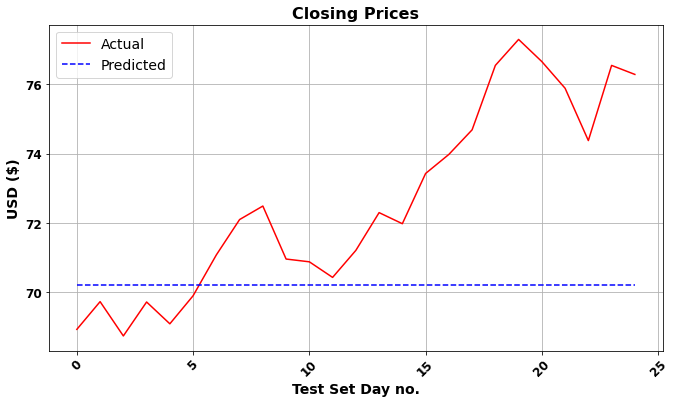

Mean Squared Error:  13.118654009179982
Mean Absolute Error:  2.8112148178125
R-squared Score: -0.7806
[INFO] training model...


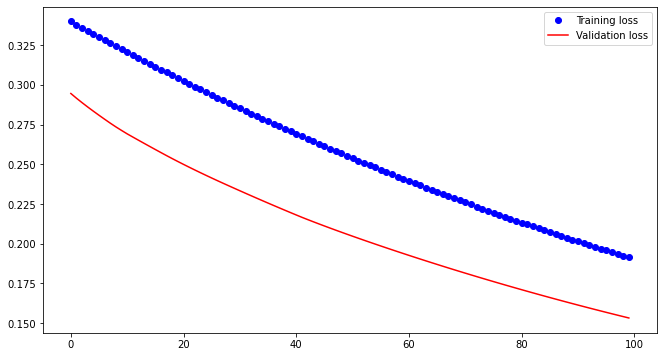

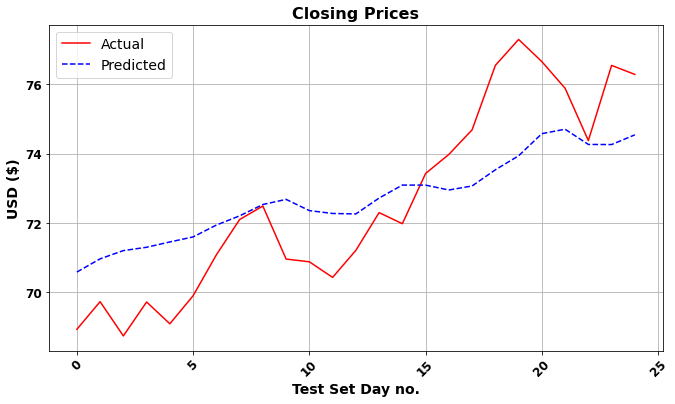

Mean Squared Error:  2.8520662161976573
Mean Absolute Error:  1.4560006888281276
R-squared Score: 0.6129
[INFO] training model...


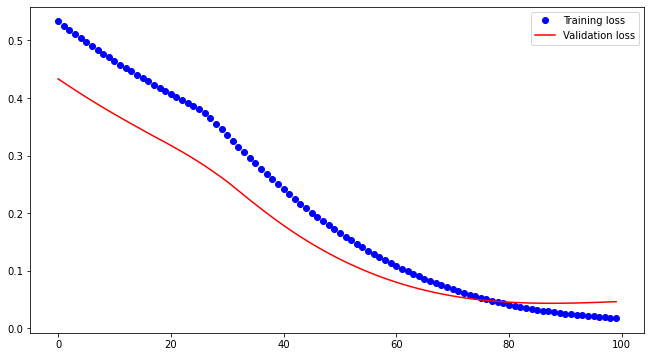

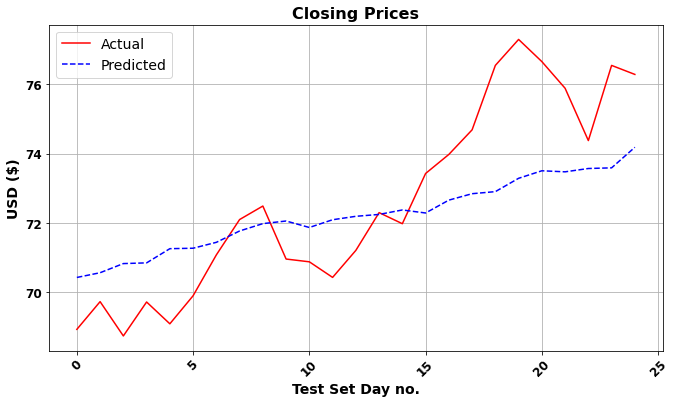

Mean Squared Error:  3.4849509649290473
Mean Absolute Error:  1.5547161727929693
R-squared Score: 0.527
[INFO] training model...


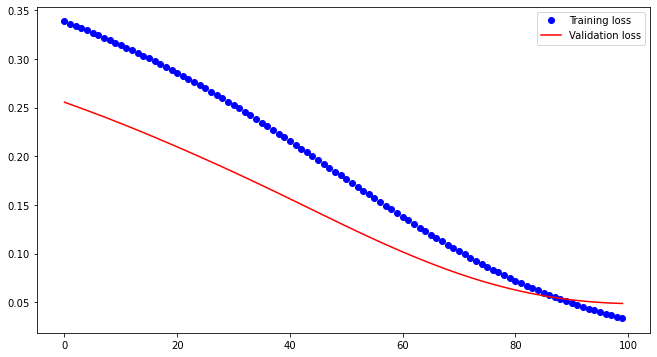

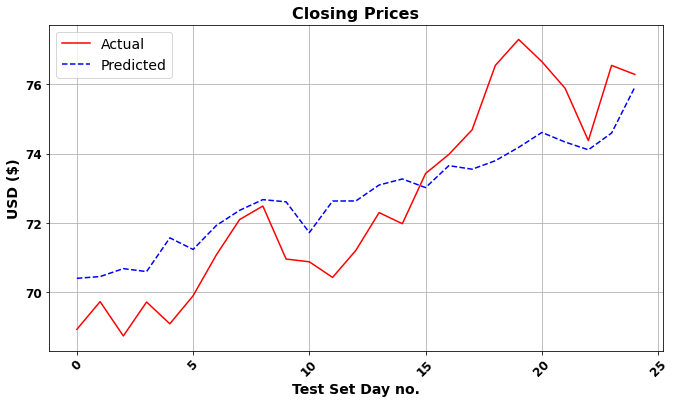

Mean Squared Error:  2.324286986688795
Mean Absolute Error:  1.2908975394140652
R-squared Score: 0.6845
[INFO] training model...


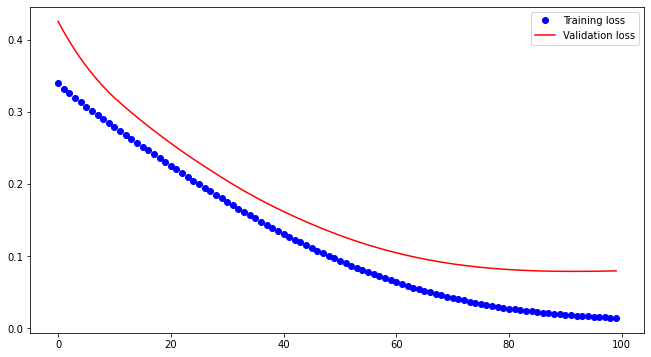

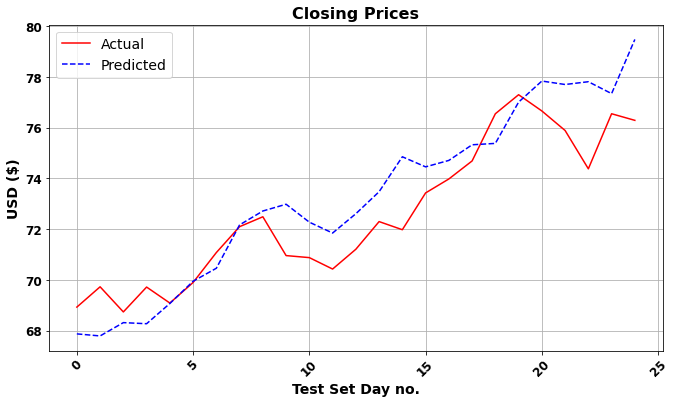

Mean Squared Error:  2.317685088223578
Mean Absolute Error:  1.2157883233203126
R-squared Score: 0.6854
[INFO] training model...


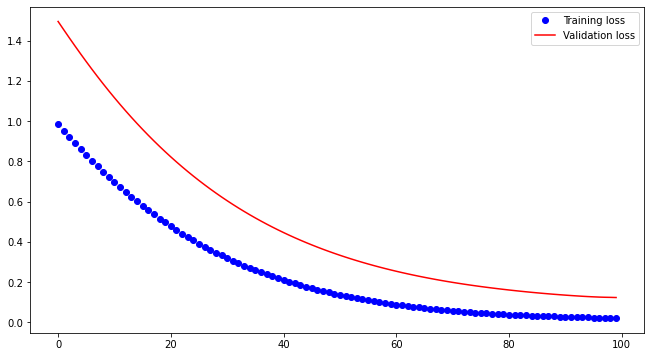

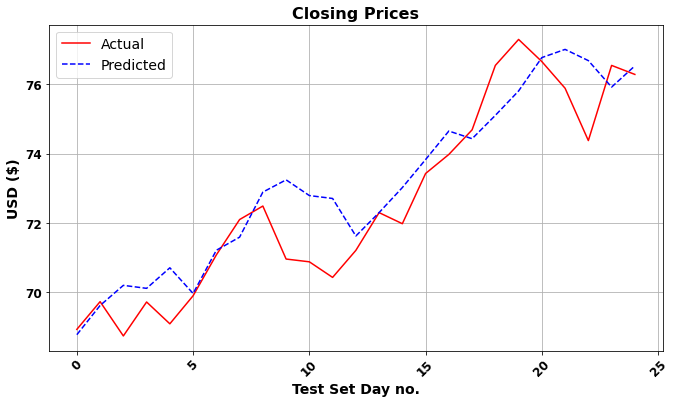

Mean Squared Error:  1.309900222184036
Mean Absolute Error:  0.8586187715820318
R-squared Score: 0.8222
[INFO] training model...


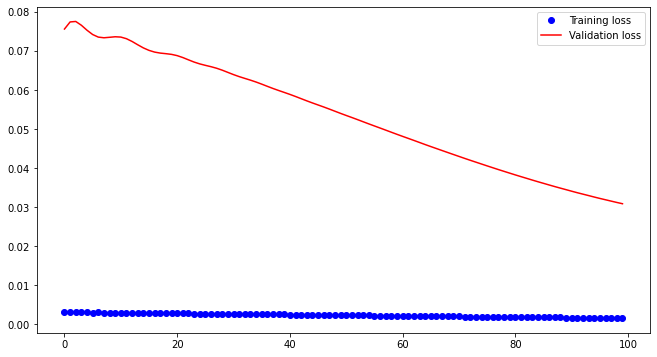

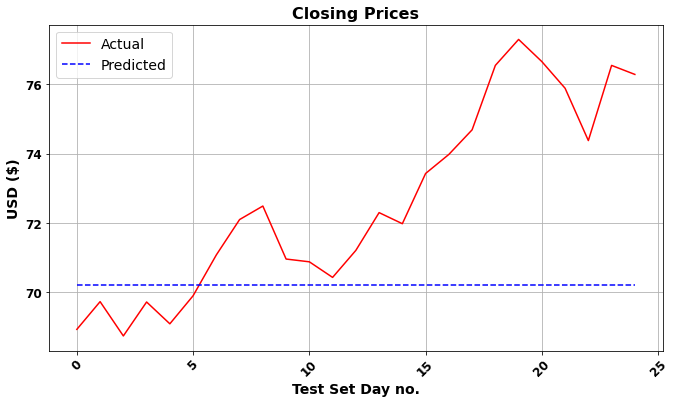

Mean Squared Error:  13.116641602620204
Mean Absolute Error:  2.810996617128906
R-squared Score: -0.7803
[INFO] training model...


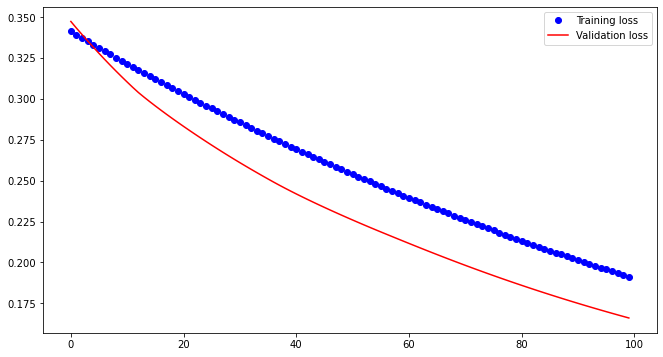

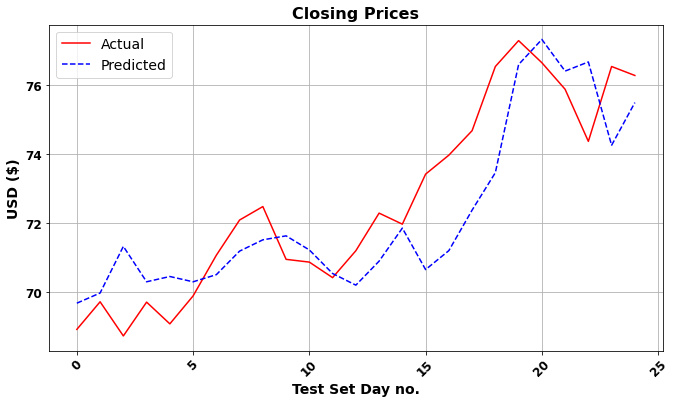

Mean Squared Error:  2.312843062840866
Mean Absolute Error:  1.2100033458203114
R-squared Score: 0.6861
[INFO] training model...


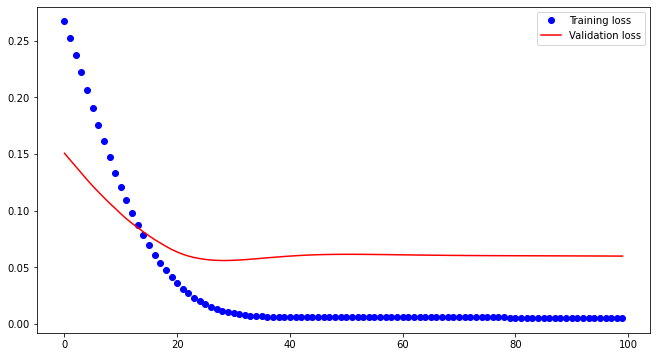

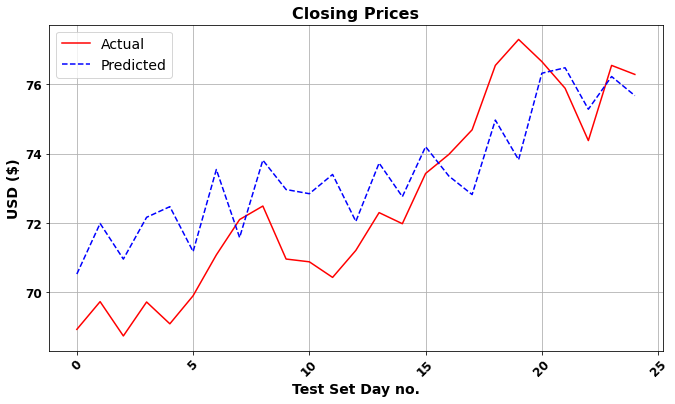

Mean Squared Error:  3.223340373008386
Mean Absolute Error:  1.542304437695313
R-squared Score: 0.5625
[INFO] training model...


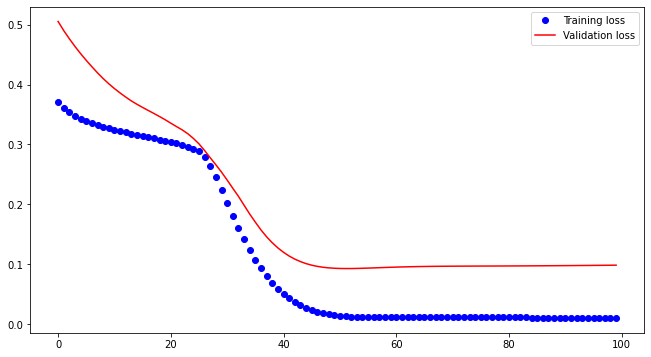

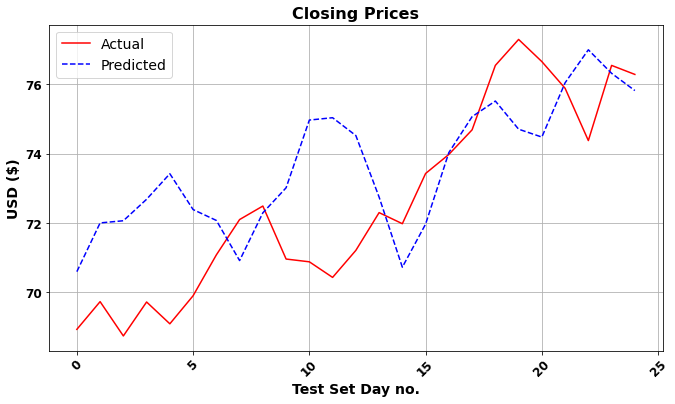

Mean Squared Error:  5.285760075731012
Mean Absolute Error:  1.8548300942578118
R-squared Score: 0.2826


(4.934612860160356, 1.6605370808652347, 0.33023455398407964)

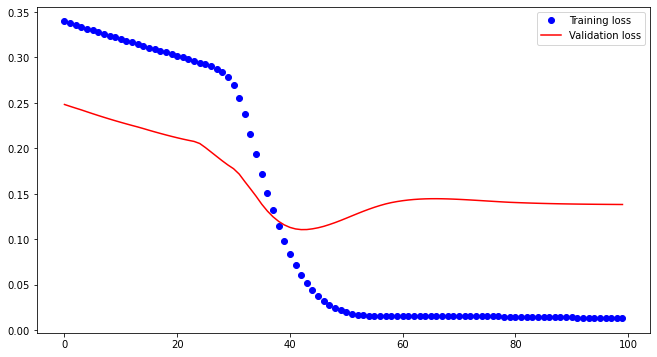

In [18]:
baseline_test(10, input_dim, X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_rescaled, scaler)

In [19]:
# wrap model into a scikit-learn compatible regressor
model = KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=input_dim)
# define a grid of the hyperparameter search space
hidden_layer_one = [25, 50, 100]
hidden_layer_two = [5, 10, 25]
learn_rate = [0.01, 0.001, 0.0001]
dropout = [0.1, 0.2 , 0.3, 0.4, 0.5]
batch_size = [4, 8, 16, 32, 64, 128]
epochs = [10, 50, 100, 500, 1000]
# create a dictionary from the hyperparameter grid
grid = dict(
    hidden_layer_one=hidden_layer_one,
    hidden_layer_two=hidden_layer_two,
    dropout=dropout,
    learn_rate=learn_rate,
    batch_size=batch_size,
    epochs=epochs
)


In [20]:

best_parameters = optimize_parameters(model, grid, X_train_scaled, y_train_scaled)


hidden_layer_one=best_parameters['hidden_layer_one']
hidden_layer_two=best_parameters['hidden_layer_two']
dropout=best_parameters['dropout']
learn_rate=best_parameters['learn_rate']
batch_size=best_parameters['batch_size']
epochs=best_parameters['epochs']


best_model = get_mlp_model(input_dim, hidden_layer_one=hidden_layer_one, hidden_layer_two=hidden_layer_two,
    dropout=dropout, learn_rate=learn_rate)



[INFO] performing random search...
Best parameters are: {'learn_rate': 0.001, 'hidden_layer_two': 25, 'hidden_layer_one': 100, 'epochs': 500, 'dropout': 0.1, 'batch_size': 128}


Epoch 1/500
2/2 [==============================] - 0s 34ms/step - loss: 0.2883 - mse: 0.2883 - mae: 0.4811 - val_loss: 0.1766 - val_mse: 0.1766 - val_mae: 0.3565
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.2215 - mse: 0.2215 - mae: 0.4184 - val_loss: 0.1316 - val_mse: 0.1316 - val_mae: 0.3026
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 0.1714 - mse: 0.1714 - mae: 0.3636 - val_loss: 0.0963 - val_mse: 0.0963 - val_mae: 0.2605
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 0.1162 - mse: 0.1162 - mae: 0.2961 - val_loss: 0.0695 - val_mse: 0.0695 - val_mae: 0.2313
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0774 - mse: 0.0774 - mae: 0.2377 - val_loss: 0.0507 - val_mse: 0.0507 - val_mae: 0.1998
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 0.0446 - mse: 0.0446 - mae: 0.1729 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1708
Epoch 7/500
2/2 [================

Epoch 50/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0734 - val_loss: 0.0290 - val_mse: 0.0290 - val_mae: 0.1294
Epoch 51/500
2/2 [==============================] - 0s 3ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0807 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.1278
Epoch 52/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0742 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.1267
Epoch 53/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0766 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.1250
Epoch 54/500
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0754 - val_loss: 0.0263 - val_mse: 0.0263 - val_mae: 0.1242
Epoch 55/500
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0669 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.1246
Epoch 56/500
2/2 [==========

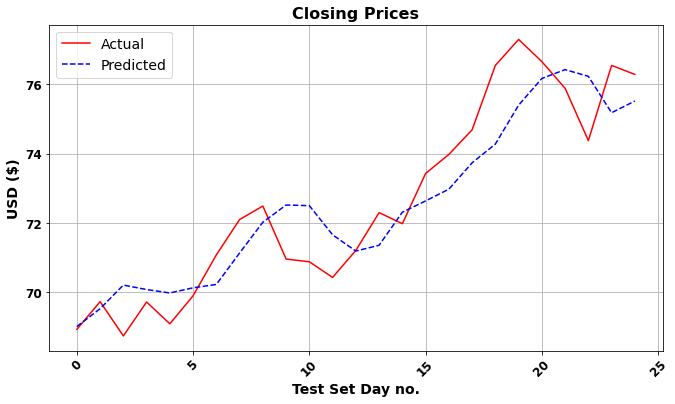

Mean Squared Error:  1.2141797814863813
Mean Absolute Error:  0.9261413733398427
R-squared Score: 0.8352


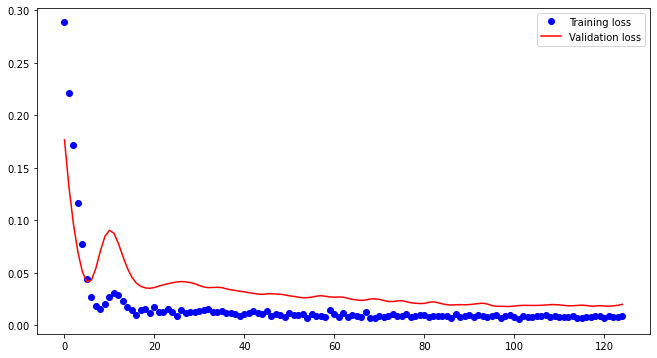

In [21]:
#
es = EarlyStopping(monitor='val_loss', mode='min', min_delta = 0, patience = 25, verbose=1, restore_best_weights=True)


history = best_model.fit(x=X_train_scaled, y=y_train_scaled,
    validation_data=(X_valid_scaled, y_valid_scaled),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=es,
    shuffle=False)

MLP_pred = best_model.predict(X_test_scaled)
MLP_pred_rescaled = scaler.inverse_transform(MLP_pred)




plot_comparison_graph(y_test_rescaled, MLP_pred_rescaled)
plot_loss(history)
measures = calculate_error_measures(y_test_rescaled, MLP_pred_rescaled)

In [18]:
plot_model(best_model,
    to_file="Reports/MLP.png",
    show_shapes=True,
    show_layer_names=False,
    rankdir="LR",
    expand_nested=True,
    dpi=96)

NameError: name 'best_model' is not defined

In [74]:
n_diffs_hybrid = find_differencing(data_close['Close'])

Estimated differencing term: 1


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9125.796, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9120.409, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9120.769, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9126.401, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9121.009, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9121.681, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9122.882, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9121.312, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.638 seconds


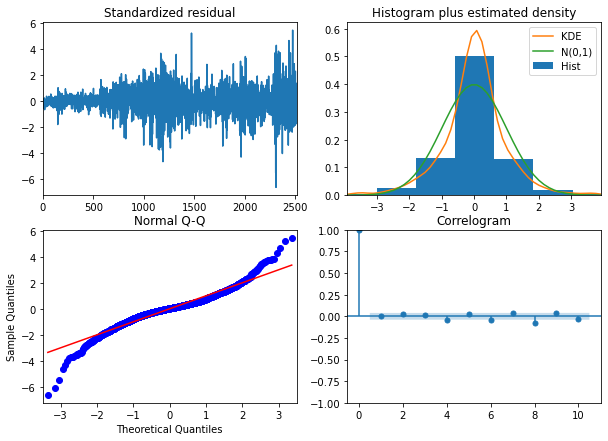

In [75]:
arima_model_order2 =  auto_arima(data_close['Close'],start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, test='kpss', seasonal_test='ocsb', error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)

arima_model_order2.plot_diagnostics(figsize=(10,7))
plt.show()

C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4557.205
Method:                       css-mle   S.D. of innovations              1.480
Date:                Mon, 02 Aug 2021   AIC                           9120.409
Time:                        13:05:48   BIC                           9137.901
Sample:                             1   HQIC                          9126.757
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0477      0.028      1.705      0.088      -0.007       0.103
ar.L1.D.Close    -0.0541      0.020     -2.720      0.007      -0.093      -0.015
                                    Root

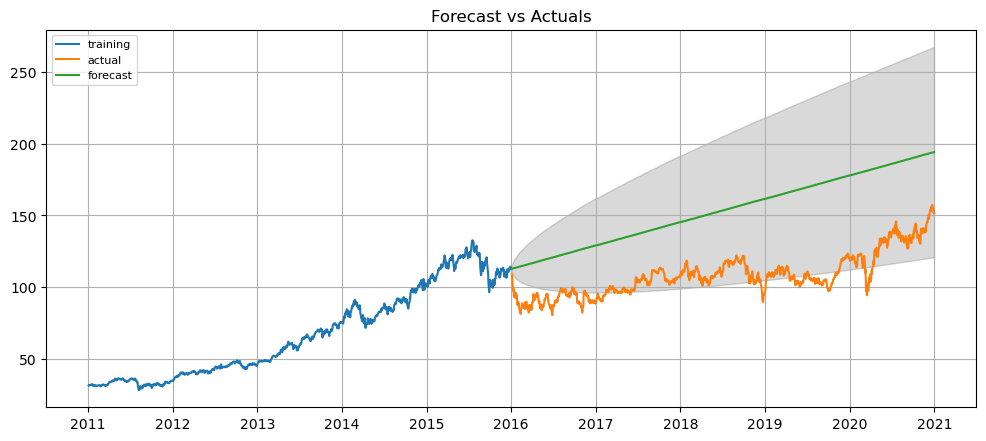

Number of values above 0.9 autocorrelation is:  13


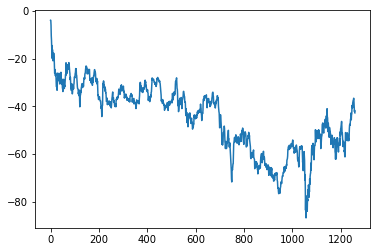

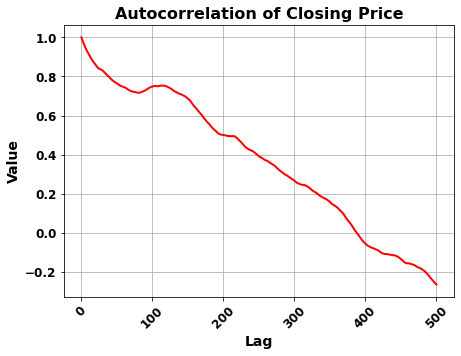

In [76]:
hybrid_ARIMA_model = ARIMA(data_close['Close'], arima_model_order2.order)  
fitted = hybrid_ARIMA_model.fit()  
print(fitted.summary())

#residuals = fitted.resid

#print(residuals.describe())


standard = StandardScaler()


###
train_data2, test_data2 = train_test_split(data_copy, test_size=0.50, shuffle = False)

fc2, fc_series = ARIMA_pred(train_data2, test_data2, arima_model_order2.order)

residuals = [a-b for a,b in zip(test_data2['Close'], fc2)]

resid = pd.DataFrame(residuals, columns = ['resid'])

plt.plot(resid)





###


#resid = pd.DataFrame(residuals, columns = ['resid'])



#resid = pd.DataFrame({'resid':residuals})


###

input_dim_hybrid = find_input_dim(resid['resid'])


###



In [77]:
list_of_attributes = ['resid']

list_of_prev_t_instants = []
for i in range(1, input_dim_hybrid+1):
    list_of_prev_t_instants.append(i)

df_new_hybrid = create_regressor_attributes(resid, list_of_attributes, list_of_prev_t_instants)

In [78]:
#X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble = create_train_valid_test(df_new_hybrid, 0.10, 0.10)

X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble = create_train_valid_test(df_new_hybrid, 0.20, 0.10)


X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble = scale_data(
    X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble, scaler)

#X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble = scale_data(
#    X_train_ensemble, y_train_ensemble, X_valid_ensemble, y_valid_ensemble, X_test_ensemble, y_test_ensemble, standard)


Shape of training inputs, training target: (896, 13) (896,)
Shape of validation inputs, validation target: (100, 13) (100,)
Shape of test inputs, test target: (250, 13) (250,)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 84        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4574 - mse: 0.4574 - mae: 0.5029 - val_loss: 0.0270 - val_mse: 0.0270 - val_mae: 0.1288
Epoch 2/100
28/28 [==============================] - 0s 607us/step - loss: 0.0710 - mse: 0.

28/28 [==============================] - 0s 643us/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0631 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0569
Epoch 46/100
28/28 [==============================] - 0s 643us/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0587 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0635
Epoch 47/100
28/28 [==============================] - 0s 643us/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0607 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0587
Epoch 48/100
28/28 [==============================] - 0s 643us/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0613 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0572
Epoch 49/100
28/28 [==============================] - 0s 643us/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0594 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0605
Epoch 50/100
28/28 [==============================] - 0s 643us/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0661 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0604
Epoch 51/100
28/2

28/28 [==============================] - 0s 679us/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0591 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0547
Epoch 95/100
28/28 [==============================] - 0s 643us/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0583 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0599
Epoch 96/100
28/28 [==============================] - 0s 643us/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0590 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0500
Epoch 97/100
28/28 [==============================] - 0s 679us/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0612 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0554
Epoch 98/100
28/28 [==============================] - 0s 679us/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0651 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0608
Epoch 99/100
28/28 [==============================] - 0s 643us/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0617 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0742
Epoch 100/100
28/

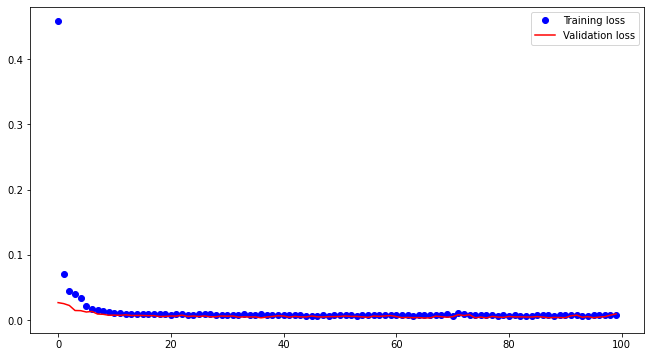

In [79]:
#
## define model
model = Sequential()
model.add(Dense(input_dim_hybrid, activation='tanh', input_dim=input_dim_hybrid))
model.add(Dense(input_dim_hybrid/2, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss="mean_squared_error",
        metrics=["mse", "mae"])

model.summary()

history_hybrid = model.fit(X_train_ensemble, y_train_ensemble,
                           validation_data=(X_valid_ensemble, y_valid_ensemble),
                           batch_size=32,
                           epochs=100)

pred_hybrid = model.predict(X_test_ensemble)
pred_hybrid = scaler.inverse_transform(pred_hybrid)


plot_loss(history_hybrid)




[array([0.], dtype=float32), array([0.38925552], dtype=float32), array([1.2012367], dtype=float32), array([1.9442215], dtype=float32), array([1.5295792], dtype=float32), array([0.29561615], dtype=float32), array([1.4664955], dtype=float32), array([2.0680084], dtype=float32), array([2.6831474], dtype=float32), array([1.9363976], dtype=float32), array([1.2609673], dtype=float32), array([0.8462677], dtype=float32), array([0.6880913], dtype=float32), array([-1.3704185], dtype=float32), array([-2.6517525], dtype=float32), array([-2.4405594], dtype=float32), array([-1.9838371], dtype=float32), array([-2.8699837], dtype=float32), array([-4.495598], dtype=float32), array([-3.6738892], dtype=float32), array([-1.4868431], dtype=float32), array([1.0488701], dtype=float32), array([1.5759964], dtype=float32), array([0.8241043], dtype=float32), array([1.4577484], dtype=float32), array([2.3798943], dtype=float32), array([2.4745445], dtype=float32), array([1.2033806], dtype=float32), array([0.9026871]

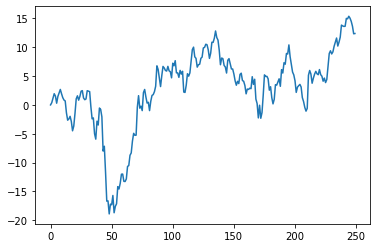

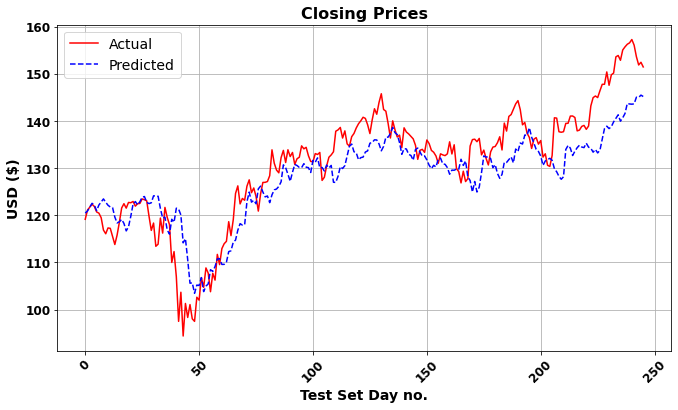

Mean Squared Error:  42.33724487432555
Mean Absolute Error:  5.069338542395119
R-squared Score: 0.7321


[42.33724487432555, 5.069338542395119, 0.7321285900458054]

In [80]:
#fcy=fc.reshape(-1, 1)
#
#scaled_data = standard.fit_transform(fcy)
##pred_hybrid = standard.fit_transform(pred_hybrid)
#
#
##comb = [sum(x) for x in zip(scaled_data, pred_hybrid)]
#comb = [a*b for a,b in zip(scaled_data, pred_hybrid)]
#
#
##ysc = standard.fit_transform(y_test_rescaled)
##
##plot_comparison_graph(ysc, comb)
##
##calculate_error_measures(ysc, comb)
##
#a = standard.inverse_transform(comb)
#
#plot_comparison_graph(y_test_rescaled, a)
#
#calculate_error_measures(y_test_rescaled, a)


if pred_hybrid[0] < 0:
    pred_hybrid = [abs(pred_hybrid[0])+i for i in pred_hybrid]
if pred_hybrid[0] > 0:
    pred_hybrid = [i-pred_hybrid[0] for i in pred_hybrid]
else:
    pass

print(pred_hybrid)

#
#if pred_hybrid[0] < 0:
#    pred_hybrid = [abs(pred_hybrid[0])+i for i in pred_hybrid]
#else:
#    pred_hybrid = [i-pred_hybrid[0] for i in pred_hybrid]


plt.plot(pred_hybrid)


#print(pred_hybrid)

#pred_hybrid = [i*-1 for i in pred_hybrid]

#comb = [sum(x) for x in zip(fc, pred_hybrid)]

#comb = [a+b if b>=0 else a-b for a,b in zip(fc, pred_hybrid)]

comb = [a+b for a,b in zip(fc, pred_hybrid)]


def equal_size(list1, list2):
    if len(list1) > len(list2):
        s = len(list1)-len(list2)
        list1 = list1[:-s]
        return list1, list2
    if len(list2) > len(list1):
        s = len(list2)-len(list1)
        list2 = list2[:-s]
        return list1, list2
    else:
        return list1, list2

y_test_rescaled, comb = equal_size(y_test_rescaled, comb)

plot_comparison_graph(y_test_rescaled, comb)


calculate_error_measures(y_test_rescaled, comb)